# TP 3 noté - Régression linéaire

 <!-- Pour vous aider à démarrer avec Python et NumPy, il existe un excellent tutoriel en ligne, créé à Stanford. Il peut être téléchargé sous forme d'un notebook sur https://github.com/kuleshov/cs228-material/tree/master/tutorials/python. -->


<font color='red'> N'HÉSITEZ PAS à inclure vos remarques/commentaires (dans les couleurs de votre choix) dans le cahier. Cela sera considéré comme un court rapport.</font> <br>
<font color='red'> Vous pouvez utiliser ChatGPT .</font><br>
<font color='red'> Vous pouvez profiter le code fourni dans le cours CM.</font><br>

## Partie 1 - Régression linéaire avec une variable

Vous implémenterez une régression linéaire avec une variable pour prédire les bénéfices d'un food truck. Supposons que vous soyez le PDG d'une franchise de restaurants et que vous envisagez d'ouvrir un nouveau point de vente dans différentes villes. La chaîne a déjà des camions dans différentes villes et vous avez des données sur les bénéfices et les populations des villes.

In [146]:
# Vos prénoms et noms
fn1 = "Enzo"
ln1 = "Erdmann"
fn2 = "Léo"
ln2 = "Vodable"

filename = "_".join(map(lambda s: s.strip().lower(), 
                        ["tp3", ln1, fn1, "and", ln2, fn2])) + ".ipynb"
print(filename)

# Modifiez le nom de votre fichier en fonction de vos noms et prénoms

tp3_erdmann_enzo_and_vodable_léo.ipynb


### Importez quelques bibliothèques et examinez les données.

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/food_truck.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [148]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Dessine le graphique pour avoir une meilleure idée de ce à quoi ressemble les données.

<AxesSubplot:xlabel='Population', ylabel='Profit'>

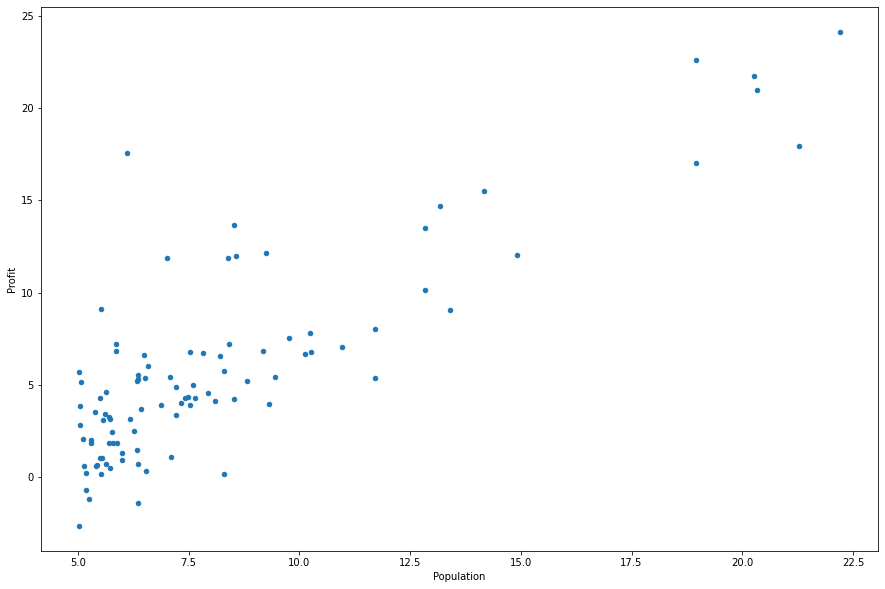

In [149]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(15,10))


### Objectif : ajuster les paramètres de régression linéaire $\mathbf{w}$ à votre ensemble de données à l'aide de la descente de gradient.

$X = {x^{1}, x^{2}, ... , x^{N}}$ est l'ensemble des données d'entrée, $t = {t^{1}, t^{2}, ... , t^{N}}$ est l'ensemble des données de sortie.

Vous supposez que votre relation entre vos données $x$ et la cible $t$ peut être modélisée par un mode linéaire

$$
\tag{1}
y(x,\mathbf{w})= w_0+w_1x
$$

L'objectif de la régression linéaire est de minimiser la fonction de coût :

$$
\tag{2}
E(\mathbf{w})=\displaystyle \frac{1}{2N} \sum_{n=1}^{N} \{y(x^n,\mathbf{w})-t^n\}^2 
$$

$N$ est le nombre d'échantillons dans l'ensemble de données.


<font color='red'> Question : dans cet ensemble de données, $N=?$ </font> N = 97 


Les paramètres de votre modèle sont les valeurs $w_j$ que vous ajusterez pour minimiser le coût $E(\mathbf{w})$.
Une solution est l'algorithme de descente de gradient par lots. En descente de gradient par lots, chaque itération effectue la mise à jour :

$$
\tag{3}
\mathbf{w}=\displaystyle \mathbf{w} - \eta \frac{1}{N} \sum_{n=1}^{N} \{y(x^n,\mathbf{w})-t^n\}x^n
$$

$$
\tag{4}
\mathbf{w_0}=\displaystyle \mathbf{w_0} - \eta \frac{1}{N} \sum_{n=1}^{N} \{(w_0 x^n_0 + w_1 x^n_1)-t^n\}x^n_0 \\ 
\mathbf{w_1}=\displaystyle \mathbf{w_1} - \eta \frac{1}{N} \sum_{n=1}^{N} \{w_0 x^n_0 + w_1 x^n_1)-t^n\}x^n_1

$$

pour le paramètre $w

A chaque étape de descente de gradient, vos paramètres $w_j$ se rapprochent des valeurs optimales qui permettront d'atteindre le coût le plus bas $E(\mathbf{w})$.

<font color='red'> Question : combien de paramètres $w$ devez-vous trouver pour ce jeu de données ? </font>  2 paramètres
 

### <font color='red'>TODO : Créer une fonction pour calculer le coût d'une solution donnée (caractérisée par les paramètres w). </font> 

- **compute_cost** pour calculer la valeur de la fonction. Cette fonction n'est pas utilisée dans l'algorithme GD, mais est souvent utilisée pour vérifier si la dérivée est correcte ou pour voir si la valeur de la fonction diminue à chaque itération.

- **compute_gradient** pour calculer la dérivée (gradient). Cela signifie la variation moyenne de la fonction de coût pour une petite variation de chaque parametre.

### Notes importantes pour la mise en œuvre dans Numpy

- Pour un array, * signifie une multiplication élément par élément et la fonction dot() est utilisée pour la multiplication matricielle.


In [150]:
# Base sur la formule (2) ci-dessus
# Dans cet ensemble de données, X est Population (chaque point de données n'a qu'une variable + une variable w_0)
# t est le profit
# mais pour coder cette fonction, vous devez considérer que X est un np.array
# (le tableau dans numpy peut avoir plus d'une dimension)

def compute_cost(X, t, w):
    #X : jeu de données en entrée de forme (N, 2)
    #       N : nombre d'exemples
    #       2 : caractéristique w_0 et w_1
    #t : cible de forme (N, )
    #w : paramètres de forme (2, )
    # Returns: loss -- le coût de la régression linéaire

    N = X.shape[0]
    predictions = X.dot(w) 
    diff = (predictions - t) ** 2
    cost = 1 / (2 * N) * np.sum(diff)

    return cost

In [151]:
# fonction pour calculer le gradient de la fonction de coût 
# en basant sur la derivee de la fonction de coût par rapport à w (voir lé formules numéro 3, 4 ci-dessus)
def compute_gradient(X, t, w):
    """X : jeu de données en entrée de forme (N,2)
        N : nombre d'exemples
        2 : caractéristique w_0 et w_1
    t : cible de forme (N,)
    w : paramètres de forme (2,)

    Returns:
    gradient -- les dérivées partielles de la fonction de coût par rapport à w, de forme (2,)
    """
    N = X.shape[0]
    hypothese = np.dot(X, w)
    errors = hypothese - t
    gradient_w0 = (1 / N) * np.sum(errors * X[:, 0])
    gradient_w1 = (1 / N) * np.sum(errors * X[:, 1])
    grad = np.array([gradient_w0, gradient_w1])

    return grad

### Essai dérivé

Le calcul de la dérivée d'une fonction de plusieurs variables est généralement assez compliqué et il est facile de faire des erreurs. Si nous calculons mal la dérivée, l'algorithme GD ne peut pas fonctionner correctement. Expérimentalement, il existe un moyen de vérifier si la dérivée calculée est correcte. Ceci est basé sur la définition de la dérivée (pour une fonction à 1 variable):

$f'(x)=\displaystyle \lim_{\epsilon \to 0} \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$

Une méthode couramment utilisée consiste à prendre une valeur ε très petit, par exemple $10^{-6}$, et de comparer la valeur calculée de la dérivée avec la valeur de la dérivée calculée à partir de la définition ci-dessus. Si les deux valeurs sont proches, il est probable que la dérivée ait été calculée correctement. Sinon, il y a probablement une erreur dans le calcul de la dérivée.

$f'(x)\approx \displaystyle \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$


### <font color='red'>TODO: Ecrivez les fonctions pour verifier le gradient </font>
- une fonction pour calculer le gradient numériquement
- une fonction pour comparer (verifier) si la fonction compute_gradient donne le même résultat que la fonction compute_gradient_numerically

In [152]:
# une fonction pour calculer le gradient numériquement
# voir les formules dans la section Essai Dérivé ci-dessus.
def compute_gradient_numerically(X, t, w):
    # w : paramètres de forme (2,)
    # epsilon est un petit nombre pour l'approximation de la différence finie
    epsilon = 1e-4
    # initialiser le gradient numérique
    num_grad = np.zeros(w.shape)
    # calculer le gradient numérique pour chaque paramètre w_i
    for i in range(w.shape[0]):
        w_plus = w.copy()
        w_plus[i] += epsilon
        w_min = w.copy()
        w_min[i] -= epsilon
        cost_plus = compute_cost(X, t, w_plus)
        cost_min = compute_cost(X, t, w_min)
        num_grad[i] = (cost_plus - cost_min) / (2 * epsilon)
    return num_grad

# verifier si la fonction compute_gradient est correcte
def check_gradient(X, t, w):
    grad = compute_gradient(X, t, w)
    numerical_grad = compute_gradient_numerically(X, t, w)
    diff = np.linalg.norm(grad - numerical_grad)
    print("Gradient calculé: ", grad)
    print("Gradient numérique: ", numerical_grad)
    print("Différence de norme: ", diff)
    return diff < 1e-6

### Preparation des données

<font color='red'>TODO: Sélectionner la cible de prédiction et créer l'ensemble de données d'entrainement X. </font>

In [153]:
# # remplir les lignes suivantes 
# cols = data.shape[1]
X = data.iloc[:,0:1]
t = data.iloc[:,1]

print(X.head())
t.head()

   Population
0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598


0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

### Ajoutons une colonne de uns au X afin que nous puissions utiliser une solution vectorisée pour calculer le coût et les gradients (utilisez X.insert).
<font color='red'>Question : pourquoi avez-vous besoin de faire cela ? (indice : lié à $w_0$)</font>

Réponse : On ajoute une colonne de 1 à X pour pouvoir calculer le biais $w_0$ en même temps que les autres poids $w_i$.

In [154]:
X.insert(0,'Ones',1)
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


La fonction de coût attend un tableau numpy, nous devons donc convertir X et t avant de pouvoir utiliser w. Nous devons également initialiser w (np.zeros). 

<font color='red'>Question : expliquez la forme de w ?</font> 

w est un tableau n de 2 colonnes 

In [155]:
X = np.array(X.values)
t = np.array(t.values)
w = np.zeros(2)

Regarder la forme de notre X,t,w.

In [156]:
# Vérifier si les formes des données sont correctes
# X est un tableau de N lignes et 2 colonnes
# w est un tableau de 2 lignes 
# t est un tableau de N lignes
X.shape, w.shape, t.shape

((97, 2), (2,), (97,))

Calculons maintenant le coût de notre solution initiale (0 valeurs pour w).

In [157]:
compute_cost(X, t, w)

32.072733877455676

Si le résultat est 32.072733877455676: jusqu'ici, tout va bien.

In [158]:
print( 'Checking gradient...', check_gradient(X, t, np.random.rand(2)))

Gradient calculé:  [ -0.59017226 -14.16177929]
Gradient numérique:  [ -0.59017226 -14.16177929]
Différence de norme:  1.9054666012907524e-12
Checking gradient... True




### <font color='red'>Exercice : Définissez une fonction pour effectuer une descente de gradient sur les paramètres en utilisant les règles de mise à jour définies dans le texte.</font>

**gradient_descent** est la principale implémentation de l'algorithme Gradient Desent mentionné ci-dessus. L'entrée de cette fonction est le taux d'apprentissage et le point de départ.

Des fonctions comme *multiply, sum* de numpy peuvent être utiles.

In [159]:
def gradient_descent(X, t, w_init, eta, iters):
    ''' X : jeu de données en entrée de forme (N, M)
    t : cible de forme (N, )
    w : paramètres de forme (M, )
    eta : taux d'apprentissage.
    iters : nombre d'itérations.

    Returns:
    w_history -- une liste des paramètres w à chaque itération
    cost_history -- une liste des coûts à chaque itération
    '''

    historique = [compute_cost(X, t, w_init)]
    w_history = [w_init]
    
    for i in range(iters):
        grad = compute_gradient(X, t, w_init)

        w_new = w_init - eta * grad
        cost = compute_cost(X, t, w_new)
        
        historique.append(cost)
        w_history.append(w_new)
        
        w_init = w_new
        
    return w_history, historique


Initialisez quelques variables supplémentaires - le taux d'apprentissage eta et le nombre d'itérations à effectuer.

In [160]:
eta = 0.001
iters = 1000

Exécutons maintenant l'algorithme de descente de gradient pour adapter nos paramètres eta à l'ensemble d'apprentissage.

In [161]:
w_init = np.zeros(2)
w_history, historique = gradient_descent(X, t, w_init, eta, iters)
print(len(w_history), len(historique))
w_history[-1]

1001 1001


array([-0.57607021,  0.8595327 ])

Résultat attendu: array([-0.57607021,  0.8595327 ])

Enfin, vous pouvez calculer le coût (erreur) du modèle entraîné à l'aide de nos paramètres ajustés.

In [162]:
compute_cost(X, t, w_history[-1])

5.480269332020323

Résultat attendu: 5.480269332020322

Maintenant, traçons le modèle linéaire avec les données pour voir visuellement à quel point il correspond.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

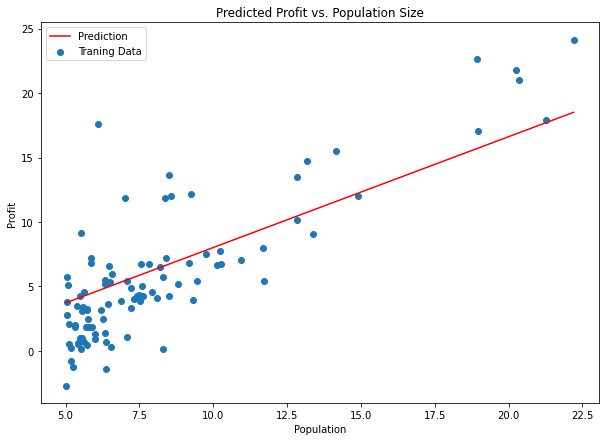

In [163]:
#TODO: compléter le code pour tracer la solution trouvée
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f_x = w_history[-1][0] + w_history[-1][1] * x

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, f_x, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Ça a l'air plutôt bien ! Étant donné que la fonction de gradient décent génère également un vecteur avec le coût à chaque itération d'entraînement, nous pouvons également le tracer. Notez que le coût diminue toujours - c'est un exemple de problème d'optimisation convexe.

Text(0.5, 1.0, 'Error vs. Training Iterations')

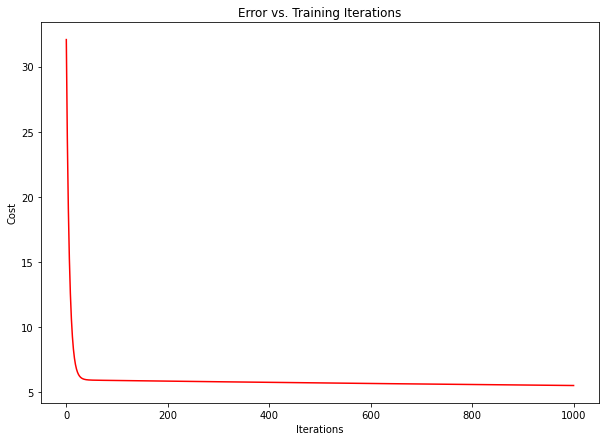

In [164]:
#TODO: tracer le coût par itération
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.arange(iters+1), historique, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Iterations')


### Visualisation la processus d'apprentissage

Maintenant on peut visualiser la processus d'apprentissage où on peut voir comment le modèle s'ajuste à chaque itération.
Apres avoir executé la cellule suivante, vous pouvez ouvrir le fichier **regression.gif** pour voir la processus d'apprentissage. 

Il vous faut déposer le fichier **regression.gif** et **ce notebook** dans Celene.

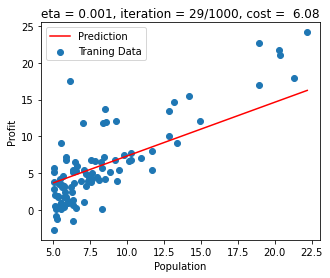

In [165]:
from matplotlib.animation import FuncAnimation
import random

def update(ii):      
    animlist = plt.cla()

    x = np.linspace(data.Population.min(), data.Population.max(), 100)
    f = w_history[ii][0] + (w_history[ii][1] * x)

    animlist = plt.plot(x, f, 'r', label='Prediction')
    animlist = plt.scatter(data.Population, data.Profit, label='Traning Data')
    animlist = plt.legend(loc=2)
    animlist = plt.xlabel('Population')
    animlist = plt.ylabel('Profit')
    animlist = plt.title(f'eta = {eta}, iteration = {ii}/{len(w_history)-1}, cost = {historique[ii]: .2f}')

fig2 = plt.figure(figsize=(5,4))
anim = FuncAnimation(fig2, update, np.arange(0, 30), interval=300)
anim.save('regression.gif', dpi = 200, writer='imagemagick')

# Ouvrir le fichier regression.gif pour voir l'animation

Nous pourrions également utiliser la fonction de régression linéaire de scikit-learn. Appliquons l'algorithme de régression linéaire de scikit-learn aux données de la partie 1 et voyons ce qu'il en ressort.

In [166]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, t)

LinearRegression()

Voici à quoi ressemblent les prédictions du modèle scikit-learn.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

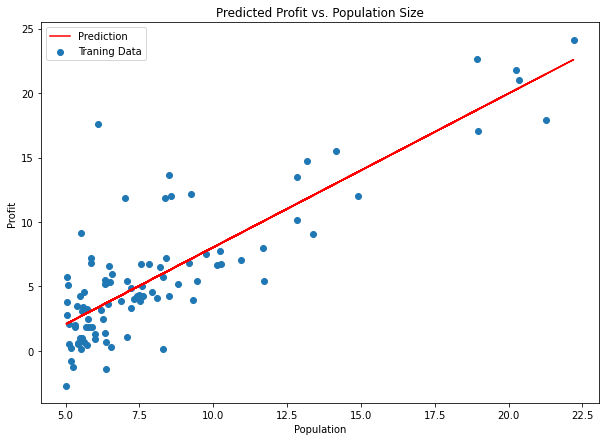

In [167]:
x = np.array(X[:, 1])
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Vous pouvez maintenant soumettre votre code via Celene.
N'oubliez pas de répondre aux questions !!!

### Notes :
- Dans ce TP on focalise sur la partie **"Modélisation"**. On n'a pas fait des étapes split de données et cross validation.
- L'objectif de ce TP est de comprendre la régression linéaire et pourvoir implementer l'algorithme de descente de gradient.

# 
